The system
=======
A system consists mainly of three parts:
    - Entities. May represent agents or inactive entities like physical space.
    - Links. Represent connections between the entities. 
    - Time. The passage of time happens.
    
Basically a system is one big graph that passes information through the links between the nodes.

In [1]:
class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.entitynames = {}
        self.links = {}
        self.time = None
    # ---

    def addEntity(self, entity, name):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.entitynames[name] = entity
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process linked items
        #TODO...
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
    # ---
        
        
    def run(self, steps):
        'Start running the simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Take steps
        for _ in range(steps):
            self.step()
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        entity = self.entitynames[entityname]
        return entity.logstate()
    # ---
                
                

Entities
=====
An entity is something that resides in the system. 

It processes information according to it's internal state and the information flowing through the links it shares with other entities.

In [2]:
class Entity:
    '''An entity is something that resides in the system.

    It processes information according to it's internal state 
    and the information flowing through the links it shares with 
    other entities.
    
    An entity registers the following methods:
        - process(time)
        - logstate()
    '''
    
    def process(self, time):
        pass
    
    def logstate(self):
        pass
    
# --- Entity

In [3]:
# < --- Expected use case:

class Cells(Entity):
    'A special type of group entity that follows a Fibbonacci pattern'
    
    def __init__(self):
        self.current = 1
        self.previous = 0
        self.changes = {}
    
    def process(self, time):
        c = self.current
        p = self.previous
        self.current, self.previous = c+p, c
        print('Processed: ', self.logstate())
        
    def logstate(self):
        return f'Current cells: {self.current}'
# --- Cells


# Create a system
sys = System()

# Add the cells
sys.addEntity(Cells(), 
              name='cells')

# Run the processes in the system
sys.run(steps=10)

# Get the state of the cells
sys.stateof('cells')

Processed:  Current cells: 1
Processed:  Current cells: 2
Processed:  Current cells: 3
Processed:  Current cells: 5
Processed:  Current cells: 8
Processed:  Current cells: 13
Processed:  Current cells: 21
Processed:  Current cells: 34
Processed:  Current cells: 55
Processed:  Current cells: 89


'Current cells: 89'

Interactions
=======

Multiple entities can interact between them through Interactions.

Interactions link 2 or more entities to perform a series of actions together.

In [4]:
class Interaction:
    'A structure representing flow of information btw entities.'
    
    def __init__(self, entities, effect):
        self.entities = entities
        self.effects = [effect]
        
    def append(self, effect):
        'Effects btw the same entities can be appended and executed in order'
        self.effects.append(effect)
# --- Interaction    

In order to achieve this, the system has to have aditional control for the propagation of the information.

In [5]:
class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = set()
        self.time = None
    # ---

    def addEntity(self, entity, name):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process linked items
        for inter in self.interactions:
            entities = inter.entities
            for effect in inter.effects:
                effect(*entities)
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
    # ---
         
    def run(self, steps):
        'Start running the simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Take steps
        for _ in range(steps):
            self.step()
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        entity = self.toentity[entityname]
        return entity.logstate()
    # ---
    
    def link(self, effect, entitynames):
        'Add a link between two named entities'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in self.interactions:
            # Add the new effect
            interactions[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            self.interactions.add( interaction )
    # ---
# --- System
                

Below we show a simple use case where interactions play an important role.

In [6]:
# < --- Intended use case:

class Animals(Entity):
    'A simple group entity.'
    
    def __init__(self, pop=10):
        self.hunt_results = None
        self.population = pop
    # ---
        
    @property
    def population(self):
        return self._population
    # ---
    
    @population.setter
    def population(self, value):
        'The population consists of integers >= 0'
        if value < 0:
            self._population = 0
        else:
            self._population = int(value)
    # ---
                                   
    def logstate(self):
        return self.population
    # ---
# ---

def limit(quantity, interval):
    bottom, top = interval
    if quantity > top:
        quantity = top
        
    elif quantity < bottom:
        quantity = bottom
        
    return quantity
# ---
        
    
class Predators(Animals):
    def process(self, time):
        self.population += self.hunt_results
        self.hunt_results = None
        self.die()
        self.logstate()
        
    def die(self):
        self.population -= 0.3*self.population
        
    def logstate(self):
        print('Total predators: ', self.population)
# ---

class Preys(Animals):
    def process(self, time):
        # Reduce population due to hunting
        self.population -= self.hunt_results
        self.hunt_results = None
        self.reproduce()
        self.logstate()
        
    def logstate(self):
        print('Total preys: ', self.population)
        
    def reproduce(self):
        self.population *= 2
# ---
            

def predation(predators, preys):
    '''The predation interaction.
    
    h (hunting) is the effect of predators in prey.
    f (feeding) is the effect of prey in predators.
    '''
    h, f = 0.005, 0.0002
    close_encounters = preys.population * predators.population
    
    preys.hunt_results = h * close_encounters
    predators.hunt_results = limit(f * close_encounters,
                                   [0, predators.population])
    
    print(f'Predators are hunting {int(preys.hunt_results)} preys')
# ---
    

# Create the system
sys = System()

# Create the cells
sys.addEntity(Predators(pop=100),
              name='Predators')
sys.addEntity(Preys(pop=100),
              name='Preys')

# Add the link btw the cells
sys.link(predation, 
         entitynames=['Predators', 'Preys'])

# Verify the initial state
sys.stateof('Predators')
sys.stateof('Preys')

# Run the simulation
sys.run(steps=50)

Total predators:  100
Total preys:  100
Predators are hunting 50 preys
Total predators:  71
Total preys:  100
Predators are hunting 35 preys
Total predators:  50
Total preys:  128
Predators are hunting 32 preys
Total predators:  35
Total preys:  192
Predators are hunting 33 preys
Total predators:  25
Total preys:  316
Predators are hunting 39 preys
Total predators:  18
Total preys:  552
Predators are hunting 49 preys
Total predators:  13
Total preys:  1004
Predators are hunting 65 preys
Total predators:  10
Total preys:  1876
Predators are hunting 93 preys
Total predators:  9
Total preys:  3564
Predators are hunting 160 preys
Total predators:  10
Total preys:  6806
Predators are hunting 340 preys
Total predators:  14
Total preys:  12930
Predators are hunting 905 preys
Total predators:  19
Total preys:  24048
Predators are hunting 2284 preys
Total predators:  26
Total preys:  43526
Predators are hunting 5658 preys
Total predators:  36
Total preys:  75734
Predators are hunting 13632 prey

The use case we are mainly interested in is in simulating several cell types along with cellular automata fields for chemicals, so we proceed to move forwards towards that intended use case

Simple Cellular Automaton
===============

Now we tackle the problem of a simple 1D CA within our framework.

In [7]:
class CellularAutomaton(Entity):
    'A simple cellular automaton.'
    
    def __init__(self, n=25):
        # Place a single active cell in the middle
        self.gridstate = tuple(1 if i == n//2 else 0
                                   for i in range(n))
        self.rule = [0, 1, 0, 1, 1, 0, 1, 0]
        
    def process(self, time):
        self.gridstate = self.applyrule(self.gridstate, self.rule)
        print(''.join(self.logstate()))
        
    def applyrule(self, grid, rule):
        newgrid = list(grid)
        for i,cell in enumerate(grid):
            # Cells at the edges are constant
            if 1 <= i < len(grid)-1:
                neighbors = grid[i-1:i+2]
                newgrid[i] = self.rule[self.neighbor_n(neighbors)]
        return tuple(newgrid)
                
    def neighbor_n(self, neighbors):
        a, b, c = neighbors
        return c + b*2 + a*4
    
    def logstate(self):
        return [ '#' if cell else '.' for cell in self.gridstate ]
    
sys = System()

sys.addEntity(CellularAutomaton(80),
              name='Sierpinsky')

print( ''.join(sys.stateof('Sierpinsky')) )

sys.run(steps=50)

........................................#.......................................
.......................................#.#......................................
......................................#...#.....................................
.....................................#.#.#.#....................................
....................................#.......#...................................
...................................#.#.....#.#..................................
..................................#...#...#...#.................................
.................................#.#.#.#.#.#.#.#................................
................................#...............#...............................
...............................#.#.............#.#..............................
..............................#...#...........#...#.............................
.............................#.#.#.#.........#.#.#.#............................
............................

We note now (with the contortions in the developer side on `CellularAutomaton.process`, line 12 and on the user side in the line 35, only to print the system state), that it is important to be available to get a representation (as __repr__ and __str__) of the system itself, as for the entities and interactions, as well as to expose the real state of the entities. So, we make further changes to the system.

In [8]:
class Entity:
    '''An entity is something that resides in the system.

    It processes information according to it's internal state 
    and the information flowing through the links it shares with 
    other entities.
    
    An entity registers the following methods:
        - process(time)
    '''
    def __init__(self):
        self.state = None
    
    def process(self, time):
        pass
# --- Entity



class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = set()
        self.time = None
    # ---
    
    def __getitem__(self, entityname):
        'Access the entities by name.'
        return self.toentity[entityname]
    # ---

    def add(self, entity, name):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process linked items
        for inter in self.interactions:
            entities = inter.entities
            for effect in inter.effects:
                effect(*entities)
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
    # ---
    
        
    def start(self):
        'Initialize things to be initialized.'
        # Init time
        if self.time is None:
            self.time = 0
    # ---
         
    def run(self, steps):
        'Start running the simulation.'
        # Make sure things are initialized 
        self.start()
        
        # Take steps
        for _ in range(steps):
            self.step()
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        return self[entityname].state
    # ---
    
    def link(self, effect, entitynames):
        'Add a link between named entities.'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in self.interactions:
            # Add the new effect
            interactions[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            self.interactions.add( interaction )
    # ---
# --- System

In [9]:
# Intended use case...
class CellularAutomaton(Entity):
    'A simple cellular automaton.'
    
    def __init__(self, n=25):
        # Place a single active cell in the middle
        self.gridstate = tuple(1 if i == n//2 else 0
                                   for i in range(n))
        self.rule = [0, 1, 0, 1, 1, 0, 1, 0]
    # ---
        
    @property
    def state(self):
        return [ '#' if cell else '.' for cell in self.gridstate ]
    # ---
        
    def process(self, time):
        'Move one time step forward.'
        self.gridstate = self.applyrule(self.gridstate)
        print(''.join(self.state))
    # ---
        
    def applyrule(self, grid):
        'Apply automaton rule to the given grid.'
        newgrid = list(grid)
        for i,cell in enumerate(grid):
            # Cells at the edges are constant
            if 1 <= i < len(grid)-1:
                neighbors = grid[i-1:i+2]
                newgrid[i] = self.rule[self.process_neighbor(neighbors)]
        # Return an immutable new grid
        return tuple(newgrid)
                
    def process_neighbor(self, neighbors):
        'Convert neighborhood to integer to apply rule.'
        a, b, c = neighbors
        return c + b*2 + a*4
    
    def __str__(self):
        return ''.join(self.state)
# --- CellularAutomaton
    

# < --- ---    


sys = System()

sys.add(CellularAutomaton(80),
              name='Sierpinsky')

print(sys['Sierpinsky'] )

sys.run(steps=50)

........................................#.......................................
.......................................#.#......................................
......................................#...#.....................................
.....................................#.#.#.#....................................
....................................#.......#...................................
...................................#.#.....#.#..................................
..................................#...#...#...#.................................
.................................#.#.#.#.#.#.#.#................................
................................#...............#...............................
...............................#.#.............#.#..............................
..............................#...#...........#...#.............................
.............................#.#.#.#.........#.#.#.#............................
............................

We made an important change to the Entity object interface, as it can be seen, the method `logstate` was eliminated, and now the Entity state can and should be accessed with the `state` attribute. From this, now 
```python
    sys.stateof('SomeEntity') == sys['SomeEntity'].state == sys.toentity['SomeEntity'].state
```

Now, it is desirable to have the ability to modify the run behavior on the fly, so, one option is to allow for hooks in the run function and on adding the automaton.

In [10]:
import collections

class Interaction:
    'A structure representing flow of information btw entities.'
    
    def __init__(self, entities, effect):
        self.entities = entities
        self.effects = [effect]
        
    def append(self, effect):
        'Effects btw the same entities can be appended and executed in order'
        self.effects.append(effect)
        
    def process(self):
        'Executes the interaction.'
        for effect in self.effects:
            effect(*self.entities)
# --- Interaction 



class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = {}
        self.time = None
        
        self.inithooks = {}
        self.prehooks = {}
        self.hooks = {}
    # ---
    
    def __getitem__(self, entityname):
        'Access the entities by name.'
        return self.toentity[entityname]
    # ---

    def add(self, entity, name, inithook=None):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
        # Process hooks
        if inithook:
            self.add_interaction_to(self.inithooks,
                                    inithook, 
                                    [name])
    # ---
    
    def process_interactions_in(self, interactions):
        'From the dict-like container of interactions, process items.'
        for interaction in interactions.values():
            interaction.process()
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process pre-step hooks
        self.process_interactions_in(self.prehooks)
        
        # Process linked items
        self.process_interactions_in(self.interactions)
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
            
        # Process post-step hooks
        self.process_interactions_in(self.hooks)
    # ---
         
    def start(self):
        'Initialize things before starting simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Make the initialization actions
        self.process_interactions_in(self.inithooks)
    # ---
    
    def update_hooks(self, hooktype, newhooks):
        'Add the given hooks to the system.'
        if newhooks:
            for hook, entitynames in newhooks:
                self.add_interaction_to(hooktype, hook, entitynames)
    # ---
         
    def run(self, steps, inithooks=None, hooks=None, prehooks=None):
        'Start running the simulation.'
        # Handle hooks
        self.update_hooks(self.inithooks, inithooks)
        self.update_hooks(self.hooks, hooks)
        self.update_hooks(self.prehooks, prehooks)
        
        # Make sure things are initialized 
        self.start()
        
        # Take steps
        for _ in range(steps):
            self.step() 
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        return self[entityname].state
    # ---
    
    def link(self, effect, entitynames):
        'Add an interation btw named entities.'
        self.add_interaction_to(self.interactions,
                                effect, 
                                entitynames)
    # ---
    
    def add_interaction_to(self, container, effect, entitynames):
        'Add an interaction btw named entities to a dict-like container.'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in container:
            # Add the new effect
            container[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            container[entities] = interaction
    # ---
# --- System

In [11]:
# Intended use case...
class SilentCA(CellularAutomaton):
    'A cellular automaton that does not print to the screen.'
        
    def process(self, time):
        'Move one time step forward, do not print state.'
        self.gridstate = self.applyrule(self.gridstate)
    # ---
# --- CellularAutomaton


def simplelogging(entity):
    'We will use this to print the state.'
    print(entity)
# ---


## < --- --- ----


sys = System()

sys.add(SilentCA(100), 
        name='Sierpinsky')

sys.run(steps=50, 
        prehooks=[(simplelogging,['Sierpinsky'])] )

print('Final state: ', sys['Sierpinsky'])
print(sys.stateof('Sierpinsky'))

..................................................#.................................................
.................................................#.#................................................
................................................#...#...............................................
...............................................#.#.#.#..............................................
..............................................#.......#.............................................
.............................................#.#.....#.#............................................
............................................#...#...#...#...........................................
...........................................#.#.#.#.#.#.#.#..........................................
..........................................#...............#.........................................
.........................................#.#.............#.#...............................

In [12]:
sys

In [13]:
sys.entities

{<__main__.SilentCA at 0x7f6c34581630>}

In [14]:
for e in sys.entities:
    help(e)

Help on SilentCA in module __main__ object:

class SilentCA(CellularAutomaton)
 |  A cellular automaton that does not print to the screen.
 |  
 |  Method resolution order:
 |      SilentCA
 |      CellularAutomaton
 |      Entity
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  process(self, time)
 |      Move one time step forward, do not print state.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from CellularAutomaton:
 |  
 |  __init__(self, n=25)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  applyrule(self, grid)
 |      Apply automaton rule to the given grid.
 |  
 |  process_neighbor(self, neighbors)
 |      Convert neighborhood to integer to apply rule.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from CellularAutomaton:
 |  
 |  state
 |  
 |  -----------------

We see now that several changes have been done to the code. The hooks where added with three flavors: inithooks (executed before the simulation starts), prehooks (executed before any step) and hooks (executed at the end of every step). This developed in a major factorization of how the interactions are applied, as the hooks are implemented using the same mechanism.

Now, let's clean up the API, so that the usage becomes more intuitive.

In [15]:
import collections

class Interaction:
    'A structure representing flow of information btw entities.'
    
    def __init__(self, entities, effect):
        self.entities = entities
        self.effects = [effect]
        
    def append(self, effect):
        'Effects btw the same entities can be appended and executed in order'
        self.effects.append(effect)
        
    def process(self):
        'Executes the interaction.'
        for effect in self.effects:
            effect(*self.entities)
# --- Interaction

'Representing an isolated process.'
Process = collections.namedtuple('Process', ['entities', 'effects'])
# --- Process


class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = {}
        self.time = None
        
        self.inithooks = {}
        self.prehooks = {}
        self.hooks = {}
    # ---
    
    def __getitem__(self, entityname):
        'Access the entities by name.'
        return self.toentity[entityname]
    # ---

    def add(self, entity, name, inithook=None):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
        # Process hooks
        if inithook:
            self.add_interaction_to(self.inithooks,
                                    inithook, 
                                    [name])
    # ---
    
    def process_interactions_in(self, interactions):
        'From the dict-like container of interactions, process items.'
        for interaction in interactions.values():
            interaction.process()
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process pre-step hooks
        self.process_interactions_in(self.prehooks)
        
        # Process linked items
        self.process_interactions_in(self.interactions)
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
            
        # Process post-step hooks
        self.process_interactions_in(self.hooks)
    # ---
         
    def start(self):
        'Initialize things before starting simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Make the initialization actions
        self.process_interactions_in(self.inithooks)
    # ---
    
    def update_hooks(self, hooktype, newhooks):
        'Add the given hooks to the system.'
        if newhooks:
            for hook in newhooks:
                self.add_interaction_to(hooktype, hook.effects, hook.entities)
    # ---
         
    def run(self, steps, init=None, after_step=None, before_step=None):
        'Start running the simulation.'
        # Handle hooks
        self.update_hooks(self.inithooks, init)
        self.update_hooks(self.hooks, after_step)
        self.update_hooks(self.prehooks, before_step)
        
        # Make sure things are initialized 
        self.start()
        
        # Take steps
        for _ in range(steps):
            self.step() 
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        return self[entityname].state
    # ---
    
    def link(self, effect, entitynames):
        'Add an interation btw named entities.'
        self.add_interaction_to(self.interactions,
                                effect, 
                                entitynames)
    # ---
    
    def add_interaction_to(self, container, effect, entitynames):
        'Add an interaction btw named entities to a dict-like container.'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in container:
            # Add the new effect
            container[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            container[entities] = interaction
    # ---
# --- System

In [16]:
# Intended use case...
class SilentCA(CellularAutomaton):
    'A cellular automaton that does not print to the screen.'
        
    def process(self, time):
        'Move one time step forward, do not print state.'
        self.gridstate = self.applyrule(self.gridstate)
    # ---
# --- CellularAutomaton


def simplelogging(entity):
    'We will use this to print the state.'
    print(entity)
# ---


## < --- --- ----


sys = System()

sys.add(SilentCA(100), 
        name='Sierpinsky')

sys.run(steps=50, 
        before_step=[Process(entities=['Sierpinsky'], 
                             effects=simplelogging   )])

print('Final state: ', sys['Sierpinsky'])
print(sys.stateof('Sierpinsky'))

..................................................#.................................................
.................................................#.#................................................
................................................#...#...............................................
...............................................#.#.#.#..............................................
..............................................#.......#.............................................
.............................................#.#.....#.#............................................
............................................#...#...#...#...........................................
...........................................#.#.#.#.#.#.#.#..........................................
..........................................#...............#.........................................
.........................................#.#.............#.#...............................

In [17]:
from cellsystem import *

sys = CellSystem()
log = FullLog()

In [18]:
sys.seed(log=log)

New cell 0 added @ (5, 5)


In [19]:
sys.step(10, log=log)

Cell no. 0 dividing @ (5, 5)
	New cells: 2 @ (4, 6) and 1 @ (5, 6)
Cell no. 1 migrating from site (5, 6) (father None)
	 New site: (5, 6)
Cell no. 2 dividing @ (4, 6)
	New cells: 4 @ (5, 5) and 3 @ (4, 6)
Cell no. 4 dividing @ (5, 5)
	New cells: 6 @ (5, 6) and 5 @ (4, 4)
Cell no. 3 dividing @ (4, 6)
	New cells: 8 @ (3, 6) and 7 @ (4, 5)
Cell no. 1 mutating @ site (5, 6) (father None)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(6, 'A')]
                	 Final genome: AAAAAAAAAA
Cell no. 7 mutating @ site (4, 5) (father 3)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(0, 'G')]
                	 Final genome: GAAAAAAAAA
Cell no. 8 migrating from site (3, 6) (father 3)
	 New site: (4, 6)
Cell no. 1 mutating @ site (5, 6) (father None)
		 Initial mutations: [(6, 'A')]
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(6, 'A'), (7, 'T')]
                	 Final genome: AAAAAAATAA
Ce

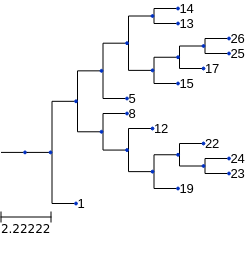

In [20]:
log.ancestry().standardize()
log.ancestry().render("%%inline")

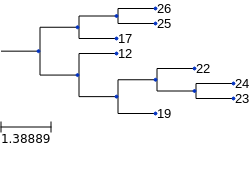

In [21]:
log.ancestry(prune_death=True).render('%%inline')

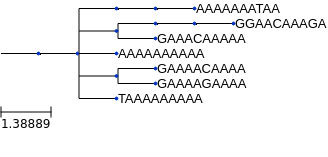

In [22]:
log.mutations().render("%%inline")

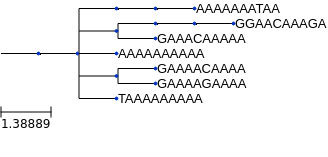

In [23]:
log.mutations().standardize()
log.mutations().render("%%inline")

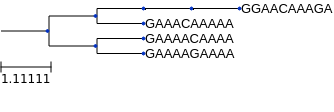

In [24]:
log.mutations(prune_death=True).render("%%inline")

# Refactoring simulation

In [89]:
from functools import wraps

def logged(action_name, prepare=True):
    """Decorate an action with logging.
    
    Allows to specify if a prelogging action is called.
    """
    # Real decorator
    def add_logging(action):
        # Decorated
        @wraps(action)
        def logged_action(self, *args, log=None, **kwargs):
            if log and prepare:
                log.preparefor(action_name, self)
                
            result = action(self, *args, **kwargs)
            
            if log:
                log.log(action_name, result)
                
            return result
        # ---
        return logged_action
    return add_logging
# ---

In [27]:
import random as rnd

class CellAction:
    """
    Cell action.

    Class used to represent actions that the cell could perform.

    """

    def __init__(self, action, actionProbability):
        """Initialize action object.

        It is initialized with a function that when called will make
        the cell perform the action and a function that when called will
        calculate the probability to perform the action.


        """
        self.action = action
        self.actionProbability = actionProbability

    def tryAction(self, log=None):
        """Perform the action according to it's probability."""
        # Sample according to the probability
        if rnd.random() < self.actionProbability():
            self.action(log=log)
# --- CellAction


class Cell:
    """
    A single cell.

    It acts according to it's state, and the states of nearby cells and sites.

    Attributes:
        + Index: A label that identifies it among others in the
                 same lineage.
        + Father: The index (lineage label) of it's father.
        + CellLine: The lineage this cell belongs to.
        + Site: The place in the grid this cell inhabits in.
        + Age: The timesteps this cell has passed through.
        + Mutations: The mutations in this cell relative to the cell
                     lineage's reference

    """

    def __init__(self, cellLine, index):
        """Create a new cell.

        Parameters:
            :param cellLine: The lineage this cell belongs to.
            :param index: The ID of this cell in the lineage.

        """
        self.index = index
        self.cellLine = cellLine
        self.father = None
        self.site = None
        self.availableActions = self.initializeActions()
        self.mutations = []
    # ---

    @property
    def coordinates(self):
        """Coordinates of the site that the cell inhabits."""
        return self.site.coordinates

    @coordinates.setter
    def coordinates(self, value):
        """Set site by coordinates."""
        self.site = self.system.at(*value)
    # ---
    
    @property
    def mutations(self):
        """Record of the mutations the cell has had.

        The mutations are relative to the ancestral genome.

        """
        return self._mutations

    @mutations.setter
    def mutations(self, value):
        """Setter for the cell's mutations."""
        self._mutations = list(value)  # COPY
    # ---

    @property
    def ancestralGenome(self):
        """Ancestral genome of the cell lineage."""
        return self.cellLine.genome
    # ---

    @property
    def genome(self):
        """Genome of the cell.

        It is assembled from the cell's ancestral genome and it's mutations.

        """
        # Get the original genome
        bases = list(self.ancestralGenome)
        # Add mutations one by one
        for pos, mutated in self.mutations:
            bases[pos] = mutated
        # Assemble the final genome
        genome = ''.join(bases)

        return genome
    # ---

    def initializeWith(self, site=None, father=None, mutations=None):
        """Initialize grid site, mutations and father."""
        if site:
            self.site = site
        if father:
            self.father = father
        if mutations:
            self.mutations = mutations  # copy
    # ---

    @logged('division')
    def divide(self, preserveFather=False):
        """Cell division.

        Get a new daughter of this cell and place it in a nearby
        neighboring site.

        """
        # Create the daughter cell
        daughter = self.newDaughter()
        # Search for the site to place the daughter in
        site = self.site.randomNeighbor()
        daughter.addTo(site)

        # If the preserveFather flag is set, we want a
        # father cell and a daughter cell after the division,
        # else, we want both resulting cells to be daughters of the
        # father cell, so this cell will migrate, set to age 0 and
        # migrate.
        if not preserveFather:
            self.father = self.index
            self.cellLine.recycleCell(self)
            self.migrate()
            
        return self, daughter
    # ---

    def divisionProbability(self):
        """Probability that this cell will divide if selected for division."""
        return 1
    # ---

    def newDaughter(self):
        """Initialize a new daughter cell.

        Initialize with father and mutation attributes.

        """
        daughter = self.cellLine.newCell()
        daughter.initializeWith( father=self.index,
                                 mutations=self.mutations )
        return daughter
    # ---

    def growOlder(self):
        """Increase the age of the current cell."""
        self.age += 1
    # ---

    def addTo(self, site):
        """Add the cell to the site."""
        self.site = site
        site.addGuest(self)
    # ---

    @logged('death')
    def die(self):
        """Cellular death."""
        self.site.removeGuest(self)
        self.cellLine.handleDeath(self)
        return self
    # ---

    def deathProbability(self):
        """Cellular death probability."""
        aliveCells = self.cellLine.totalAliveCells()
        if aliveCells > 1:
            return 0.6
        else:
            return 0
    # ---
    
    @logged('migration')
    def migrate(self):
        """Migrate to a neighboring cell."""
        # Get the destination site
        nextSite = self.site.randomNeighbor()
        # Migrate to the new site
        self.site.removeGuest(self)
        nextSite.addGuest(self)
        self.site = nextSite
        
        return self
    # ---

    def migrationProbability(self):
        """Migration probability for this cell."""
        return 1

    # ---
    
    @logged('mutation')
    def mutate(self):
        """Do a single site mutation.

        Note: The genome may not represent a nucleotide sequence, so these
        mutations may not represent SNPs.

        """
        # Get the genome characteristics
        # Convert alphabet to tuple to call rnd.choice with it
        alphabet = tuple(self.cellLine.genomeAlphabet)
        genomeLength = len(self.genome)
        # Assemble the mutation
        position = rnd.randint(0, 
                               genomeLength-1)  # Pick a random position in the genome
        mutated = rnd.choice(alphabet)
        # Mutate
        self.mutations.append((position, mutated))
        
        return self
    # ---

    def mutationProbability(self):
        """Probability to mutate if selected for it."""
        return 1
    # ---

    def initializeActions(self):
        """Return a list with the possible actions to take for this cell."""
        # Death action
        death = CellAction(self.die, self.deathProbability)
        # Division action
        division = CellAction(self.divide, self.divisionProbability)

        # Migration action
        migration = CellAction(self.migrate, self.migrationProbability)

        # Mutation action
        mutation = CellAction(self.mutate, self.mutationProbability)

        return [mutation, migration, division, death]
    # ---

    def step(self, log=None):
        """Select an action and perform it."""
        # Make the cell older
        self.growOlder()
        # Select an action
        action = rnd.choice(self.availableActions)
        # Perform the action according to it's respective probability
        action.tryAction(log=log)
    # ---
# --- Cell

In [28]:
import random as rnd


class CellLine:
    """
    Handles the specimens of a specific cell lineage.

    A cell lineage is a group of cells that have a common ancestor, we
    represent the common ancestor by it's ancestral genome.
    This structure is in charge of holding this ancestral code and managing
    the cells creating new cells when needed and cleaning up the dead ones.

    Atributes:
            + Ancestral genome: A string-like object.
            + Cells: The cells inherited from this cell line.
            + Alive/Dead cells.
            + Current cell index: Each cell has a unique index. This is the
                                  index to place in the next cell to be born.

    """

    def __init__(self,
                 system,
                 genome=None,
                 genomeAlphabet=None,
                 recycleDeadCells=True):
        """Creation of a cell lineage.

        Parameters:
            :param genome: (optional) A sequence representing the base
                            genome of the cells from this line.
            :param genomeAlphabet: (optional) The items of which the genome
                                   sequence is formed.

            If a custom genome is passed, the genome alphabet should be
            passed too unless it is formed of the letters in "ACGT".

            Also, dead cells are recycled by default, this helps to improve
            memory usage.

        """
        self.recycleDeadCells = recycleDeadCells
        self.currentIndex = 0
        self.cells = []
        self.aliveCells = set()
        self.deadCells = set()
        self.system = system

        # Set the default genome
        if not genome:
            genome = 10 * 'A'
        self.genome = genome

        # Check if the genome alphabet option was set
        if not genomeAlphabet:
            genomeAlphabet = "ACGT"
        self.genomeAlphabet = genomeAlphabet

        # Validate the resulting genome/genome alphabet combination
        if not self.validateGenome(genome, genomeAlphabet):
            # ERROR
            raise ValueError(
                '"genome" must contain only letters\
                 present in the "genomeAlphabet"' )
    # ---
    
    @classmethod
    def validateGenome(cls, genome, genomeAlphabet):
        """Check if the genome is assembled from the genome alphabet."""
        # Eliminate dups
        genomeLetters = set(genome)
        # Are they valid?
        return all( (l in genomeAlphabet) for l in genomeLetters )
    # ---

    @logged('newcell', prepare=False)
    def addCellTo(self, site):
        """Add a new, initialized cell to the given site.

        Return the added cell to the caller.

        """
        new = self.newCell()
        new.addTo(site)
        # Return the new cell
        return new
    # ---

    def newCell(self):
        """Get a new blank cell in this lineage and system."""
        # Fetch a blank cell
        if self.recycleDeadCells and self.deadCells:
            # Fetch a dead cell to recycle
            new = self.cellToRecycle()
            self.recycleCell(new)
        else:
            # Fetch a fresh, new cell
            new = Cell( cellLine = self,
                        index = self.currentIndex )
            self.currentIndex += 1
            self.cells.append(new)

        # Update state to take new cell into account
        self.aliveCells.add(new)
        return new
    # ---

    def cellToRecycle(self):
        """Return a cell from the dead ones."""
        recycled = self.deadCells.pop()
        return recycled
    # ---

    def recycleCell(self, cell):
        """Clear previous information from a cell."""
        # Place new ID
        cell.index = self.currentIndex
        self.currentIndex += 1
        # Delete age
        cell.age = 0
    # ---

    def getAliveCells(self):
        """Return the cells currently alive."""
        return self.aliveCells
    # ---

    def totalAliveCells(self):
        """Return the total number of alive cells."""
        return len(self.aliveCells)
    # ---

    def sample(self, all=False, n=1):
        """Take a sample of alive cells.

        :param all: If True, return all alive cells, else, return a sample of
                    size n.
        :param n: The size of the sample. If 1, return the cell without a
                  container.

        """
        # If it is asked for all cells,
        # take a sample of the whole size
        if all:
            n = len(self.aliveCells)
        # If n equals 1, return a single cell
        elif n == 1:
            [singleCell] = rnd.sample(self.aliveCells, 1)
            return singleCell
        # Return a sample of size n
        return rnd.sample(self.aliveCells, n)
    # ---

    def handleDeath(self, dying):
        """Process a dying cell.

        This means removing from the alive cells and adding to the dead ones,
        maybe to recicle it when another is born.

        """
        self.aliveCells.remove(dying)
        self.deadCells.add(dying)
    # ---
# --- CellLine

In [29]:
import random as rnd

class CellAction:
    """
    Cell action.

    Class used to represent actions that the cell could perform.

    """

    def __init__(self, action, actionProbability):
        """Initialize action object.

        It is initialized with a function that when called will make
        the cell perform the action and a function that when called will
        calculate the probability to perform the action.


        """
        self.action = action
        self.actionProbability = actionProbability

    def tryAction(self, log=None):
        """Perform the action according to it's probability."""
        # Sample according to the probability
        if rnd.random() < self.actionProbability():
            self.action(log=log)
# --- CellAction


class Cell:
    """
    A single cell.

    It acts according to it's state, and the states of nearby cells and sites.

    Attributes:
        + Index: A label that identifies it among others in the
                 same lineage.
        + Father: The index (lineage label) of it's father.
        + CellLine: The lineage this cell belongs to.
        + Site: The place in the grid this cell inhabits in.
        + Age: The timesteps this cell has passed through.
        + Mutations: The mutations in this cell relative to the cell
                     lineage's reference

    """

    def __init__(self, cellLine, index):
        """Create a new cell.

        Parameters:
            :param cellLine: The lineage this cell belongs to.
            :param index: The ID of this cell in the lineage.

        """
        self.index = index
        self.cellLine = cellLine
        self.father = None
        self.site = None
        self.availableActions = self.initializeActions()
        self.mutations = []
    # ---

    @property
    def coordinates(self):
        """Coordinates of the site that the cell inhabits."""
        return self.site.coordinates

    @coordinates.setter
    def coordinates(self, value):
        """Set site by coordinates."""
        self.site = self.system.at(*value)
    # ---
    
    @property
    def mutations(self):
        """Record of the mutations the cell has had.

        The mutations are relative to the ancestral genome.

        """
        return self._mutations

    @mutations.setter
    def mutations(self, value):
        """Setter for the cell's mutations."""
        self._mutations = list(value)  # COPY
    # ---

    @property
    def ancestralGenome(self):
        """Ancestral genome of the cell lineage."""
        return self.cellLine.genome
    # ---

    @property
    def genome(self):
        """Genome of the cell.

        It is assembled from the cell's ancestral genome and it's mutations.

        """
        # Get the original genome
        bases = list(self.ancestralGenome)
        # Add mutations one by one
        for pos, mutated in self.mutations:
            bases[pos] = mutated
        # Assemble the final genome
        genome = ''.join(bases)

        return genome
    # ---

    def initializeWith(self, site=None, father=None, mutations=None):
        """Initialize grid site, mutations and father."""
        if site:
            self.site = site
        if father:
            self.father = father
        if mutations:
            self.mutations = mutations  # copy
    # ---

    @logged('division')
    def divide(self, preserveFather=False):
        """Cell division.

        Get a new daughter of this cell and place it in a nearby
        neighboring site.

        """
        # Create the daughter cell
        daughter = self.newDaughter()
        # Search for the site to place the daughter in
        site = self.site.randomNeighbor()
        daughter.addTo(site)

        # If the preserveFather flag is set, we want a
        # father cell and a daughter cell after the division,
        # else, we want both resulting cells to be daughters of the
        # father cell, so this cell will migrate, set to age 0 and
        # migrate.
        if not preserveFather:
            self.father = self.index
            self.cellLine.recycleCell(self)
            self.migrate()
            
        return self, daughter
    # ---

    def divisionProbability(self):
        """Probability that this cell will divide if selected for division."""
        return 1
    # ---

    def newDaughter(self):
        """Initialize a new daughter cell.

        Initialize with father and mutation attributes.

        """
        daughter = self.cellLine.newCell()
        daughter.initializeWith( father=self.index,
                                 mutations=self.mutations )
        return daughter
    # ---

    def growOlder(self):
        """Increase the age of the current cell."""
        self.age += 1
    # ---

    def addTo(self, site):
        """Add the cell to the site."""
        self.site = site
        site.addGuest(self)
    # ---

    @logged('death')
    def die(self):
        """Cellular death."""
        self.site.removeGuest(self)
        self.cellLine.handleDeath(self)
        return self
    # ---

    def deathProbability(self):
        """Cellular death probability."""
        aliveCells = self.cellLine.totalAliveCells()
        if aliveCells > 1:
            return 0.6
        else:
            return 0
    # ---
    
    @logged('migration')
    def migrate(self):
        """Migrate to a neighboring cell."""
        # Get the destination site
        nextSite = self.site.randomNeighbor()
        # Migrate to the new site
        self.site.removeGuest(self)
        nextSite.addGuest(self)
        self.site = nextSite
        
        return self
    # ---

    def migrationProbability(self):
        """Migration probability for this cell."""
        return 1

    # ---
    
    @logged('mutation')
    def mutate(self):
        """Do a single site mutation.

        Note: The genome may not represent a nucleotide sequence, so these
        mutations may not represent SNPs.

        """
        # Get the genome characteristics
        # Convert alphabet to tuple to call rnd.choice with it
        alphabet = tuple(self.cellLine.genomeAlphabet)
        genomeLength = len(self.genome)
        # Assemble the mutation
        position = rnd.randint(0, 
                               genomeLength-1)  # Pick a random position in the genome
        mutated = rnd.choice(alphabet)
        # Mutate
        self.mutations.append((position, mutated))
        
        return self
    # ---

    def mutationProbability(self):
        """Probability to mutate if selected for it."""
        return 1
    # ---

    def initializeActions(self):
        """Return a list with the possible actions to take for this cell."""
        # Death action
        death = CellAction(self.die, self.deathProbability)
        # Division action
        division = CellAction(self.divide, self.divisionProbability)

        # Migration action
        migration = CellAction(self.migrate, self.migrationProbability)

        # Mutation action
        mutation = CellAction(self.mutate, self.mutationProbability)

        return [mutation, migration, division, death]
    # ---

    def step(self, log=None):
        """Select an action and perform it."""
        # Make the cell older
        self.growOlder()
        # Select an action
        action = rnd.choice(self.availableActions)
        # Perform the action according to it's respective probability
        action.tryAction(log=log)
    # ---
# --- Cell

In [ ]:
import collections

class Entity:
    '''An entity is something that resides in the system.

    It processes information according to it's internal state 
    and the information flowing through the links it shares with 
    other entities.
    
    An entity registers the following methods:
        - process(time)
    '''
    def __init__(self):
        self.state = None
    
    def process(self, time):
        pass
# --- Entity


class Interaction:
    'A structure representing flow of information btw entities.'
    
    def __init__(self, entities, effect):
        self.entities = entities
        self.effects = [effect]
        
    def append(self, effect):
        'Effects btw the same entities can be appended and executed in order'
        self.effects.append(effect)
        
    def process(self):
        'Executes the interaction.'
        for effect in self.effects:
            effect(*self.entities)
# --- Interaction

'Representing an isolated process.'
Process = collections.namedtuple('Process', ['entities', 'effects'])
# --- Process


class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = {}
        self.time = None
        
        self.inithooks = {}
        self.prehooks = {}
        self.hooks = {}
    # ---
    
    def __getitem__(self, entityname):
        'Access the entities by name.'
        return self.toentity[entityname]
    # ---

    def add(self, entity, name, inithook=None):
        'Add an entity to the graph.'
        self.entities.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
        # Process hooks
        if inithook:
            self.add_interaction_to(self.inithooks,
                                    inithook, 
                                    [name])
    # ---
    
    def process_interactions_in(self, interactions):
        'From the dict-like container of interactions, process items.'
        for interaction in interactions.values():
            interaction.process()
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process pre-step hooks
        self.process_interactions_in(self.prehooks)
        
        # Process linked items
        self.process_interactions_in(self.interactions)
        # Process each entity
        for entity in self.entities:
            entity.process(self.time)
            
        # Process post-step hooks
        self.process_interactions_in(self.hooks)
    # ---
         
    def start(self):
        'Initialize things before starting simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Make the initialization actions
        self.process_interactions_in(self.inithooks)
    # ---
    
    def update_hooks(self, hooktype, newhooks):
        'Add the given hooks to the system.'
        if newhooks:
            for hook in newhooks:
                self.add_interaction_to(hooktype, hook.effects, hook.entities)
    # ---
         
    def run(self, steps, init=None, after_step=None, before_step=None):
        'Start running the simulation.'
        # Handle hooks
        self.update_hooks(self.inithooks, init)
        self.update_hooks(self.hooks, after_step)
        self.update_hooks(self.prehooks, before_step)
        
        # Make sure things are initialized 
        self.start()
        
        # Take steps
        for _ in range(steps):
            self.step() 
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        return self[entityname].state
    # ---
    
    def link(self, effect, entitynames):
        'Add an interation btw named entities.'
        self.add_interaction_to(self.interactions,
                                effect, 
                                entitynames)
    # ---
    
    def add_interaction_to(self, container, effect, entitynames):
        'Add an interaction btw named entities to a dict-like container.'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in container:
            # Add the new effect
            container[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            container[entities] = interaction
    # ---
# --- System


In [127]:
import random as rnd

def wrap(n, maxValue):
    """Auxiliary function to wrap an integer on maxValue.

    Examples:
            >>> # For positives: wrap(n, maxValue) = n % maxValue
            >>> [ wrap(i,3) for i in range(9) ]
            [0, 1, 2, 0, 1, 2, 0, 1, 2]

            >>> # For negatives, the pattern is continued in a natural way
            >>> for i in range(-5, 5+1): print(f'{i} : {wrap(i, 3)}')
            ...
            -3 : 0
            -2 : 1
            -1 : 2
            0 : 0
            1 : 1
            2 : 2

    """
    if n >= maxValue:
        n %= maxValue
    elif n < 0:
        # We must offset the integer to the positives
        n += abs(n//maxValue)*maxValue
    return n
# ---

def toroidal_wrap(grid, i, j):
    """Return i,j wrapped on the grid dimensions."""
    # Wrap the coordinates
    i = wrap(i, grid.rows)
    j = wrap(j, grid.cols)
    return i,j
# ---


class Site:
    """
    A unit of space.

    Cells inhabitate in these spaces and interact with their neighborhood.

    Is aware of:
            + World: The world it forms a part of.
            + Coordinates <i,j>: Coordinates in the matrix.
            + Guests: <List>: The guests currently inhabiting this site.

    """

    def __init__(self, world, coordinates):
        """Assemble a site in which agents may inhabit.

        :param world: The world which this forms a part of.
        :param coordinates: The coordinates in the world.

        """
        self.world = world
        self._coordinates = coordinates  # Set variable only once
        self.guests = set()
    # ---

    @property
    def coordinates(self):
        """Getter for the site's coordinates."""
        return self._coordinates
    # ---

    def add_guest(self, guest):
        """Add the given cell as a new guest to this site."""
        self.guests.add(guest)
        guest.site = self
    # ---

    def remove_guest(self, guest):
        """Remove the given cell as guest for this site.

        If the cell is not currently in this site, an error is throwed.
        
        """
        try:
            self.guests.remove(guest)
        except KeyError:
            raise KeyError('Guest with index {} is not at site ({},{})'
                                            .format(guest.index, i, j))
    # ---

    def guest_count(self):
        """Return the number of guests residing in this site."""
        return len(self.guests)
    # ---

    def random_neighbor(self):
        """Return a random site in the neighborhood of the current site."""
        # Get your actual coordinates
        i, j = self.coordinates
        # Select a neighbor
        return self.world.random_neighbor_of(self)
    # ---
# --- Site



# < -----
class World:
    """
    The space in which cells inhabit. 

    Aware of space (as a grid) and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    A system is aware of:
            - Grid: The sites the action develops in.
            - Cells: The cells that live, die and interact in the grid.
            - Neighborhood: How many and which sites may directly influence or
                            be influenced by another.

    """

    def __init__(self, grid_dimensions=(10, 10), wrap=toroidal_wrap):
        """Initialize the world.

        :param grid_dimensions: Tuple specifying rows and columns.
        :param wrap: Callable. How does the grid treats out-of-range coordinates?

        """
        # Set dimensions
        self.rows, self.cols = grid_dimensions
        # Initialize grid
        self.wrap_function = wrap  # Toroidal wrapping behavior of the grid
        self.grid = tuple( Site(self, coordinates=(i,j))
                               for i in range(self.rows)
                                   for j in range(self.cols) )
        # Initialize neighborhood
        self.neighborhood = [ (-1,-1), (-1, 0), (-1, 1),
                              ( 0,-1), ( 0, 0), ( 0, 1),
                              ( 1,-1), ( 1, 0), ( 1, 1) ]
    # ---

    def at(self, i, j):
        """Get the site at the specified coordinates."""
        # Wrap (toroidal coordinates)
        if self.wrap_function:
            i,j = self.wrap_function(self, i,j)
        # The grid is 1D, so we must convert from 2D
        ij = self.cols*i + j
        return self.grid[ij]
    # ---

    def random_neighbor_of(self, site):
        """Return the relative coordinates of the available neighbors.

        Returns a container holding pairs of numbers. the prescence of an item
        (a,b) means that a site at i,j has a neighbor at (i+a, j+b).

        """
        # Get the site coordinates
        i,j = site.coordinates
        # Select a neighbor
        n_i, n_j = rnd.choice(self.neighborhood)
        # Fetch the neighbor
        return self.at( i+n_i, j+n_j )
    # ---
# --- World

In [221]:
import random as rnd

class CellAction:
    """
    Cell action.

    Class used to represent actions that the cell could perform.

    """

    def __init__(self, action, probability):
        """Initialize action object.

        It is initialized with a function that when called will make
        the cell perform the action and a function that when called will
        calculate the probability to perform the action.


        """
        self.action = action
        self.probability = probability

    def try_action(self, log=None):
        """Perform the action according to it's probability."""
        # Sample according to the probability
        if rnd.random() < self.probability():
            self.action(log=log)
# --- CellAction


class Cell:
    """
    A single cell.

    It acts according to it's state, and the states of nearby cells and sites.

    Attributes:
        + Index: A label that identifies it among others in the
                 same lineage.
        + Father: The index (lineage label) of it's father.
        + CellLine: The lineage this cell belongs to.
        + Site: The place in the grid this cell inhabits in.
        + Age: The timesteps this cell has passed through.
        + Mutations: The mutations in this cell relative to the cell
                     lineage's reference

    """

    def __init__(self, lineage, index):
        """Create a new cell.

        Parameters:
            :param cell_line: The lineage this cell belongs to.
            :param index: The ID of this cell in the lineage.

        """
        self.index = index
        self.lineage = lineage
        self.father = None
        self.site = None
        self.actions = self.init_actions()
        self.mutations = []
    # ---

    @property
    def coordinates(self):
        """Coordinates of the site that the cell inhabits."""
        return self.site.coordinates

    @property
    def mutations(self):
        """Record of the mutations the cell has had.

        The mutations are relative to the ancestral genome.

        """
        return self._mutations

    @mutations.setter
    def mutations(self, value):
        """Setter for the cell's mutations."""
        self._mutations = list(value)  # COPY
    # ---

    @property
    def ancestralGenome(self):
        """Ancestral genome of the cell lineage."""
        return self.lineage.genome
    # ---

    @property
    def genome(self):
        """Genome of the cell.

        It is assembled from the cell's ancestral genome and it's mutations.

        """
        # Get the original genome
        bases = list(self.ancestralGenome)
        # Add mutations one by one
        for position, mutated in self.mutations:
            bases[position] = mutated
        # Assemble the final genome
        genome = ''.join(bases)

        return genome
    # ---

    def initialize(self, site=None, father=None, mutations=None):
        """Initialize grid site, mutations and father."""
        if site:
            self.site = site
        if father:
            self.father = father
        if mutations:
            self.mutations = mutations  # copy
    # ---
    
    @logged('migration')
    def migrate(self):
        """Migrate to a neighboring cell."""
        # Get the destination site
        next_site = self.site.random_neighbor()
        # Migrate to the new site
        self.site.remove_guest(self)
        next_site.add_guest(self)
        self.site = next_site
        
        return self
    # ---

    def migrationProbability(self):
        """Migration probability for this cell."""
        return 1
    # ---
    
    @logged('mutation')
    def mutate(self):
        """Do a single site mutation.

        Note: The genome may not represent a nucleotide sequence, so these
        mutations may not represent SNPs.

        """
        # Get the genome characteristics
        # Convert alphabet to tuple to call rnd.choice with it
        alphabet = tuple(self.lineage.genome_alphabet)
        genome_length = len(self.genome)
        # Assemble the mutation
        position = rnd.randint(0, 
                               genome_length-1)  # Pick a random position in the genome
        mutated = rnd.choice(alphabet)
        # Mutate
        self.mutations.append((position, mutated))
        
        return self
    # ---

    def mutationProbability(self):
        """Probability to mutate if selected for it."""
        return 1
    # ---

    @logged('death')
    def die(self):
        """Cellular death."""
        self.site.remove_guest(self)
        self.lineage.handle_death(self)
        return self
    # ---

    def deathProbability(self):
        """Cellular death probability."""
        # Avoid killing all cells.
        if self.lineage.total_cells > 1:
            return 0.6
        else:
            return 0
    # ---
    
    @logged('division')
    def divide(self, preserve_father=False):
        """Cell division.

        Get a new daughter of this cell and place it in a nearby
        neighboring site.

        """
        # Create the daughter cell
        daughter = self.new_daughter()
        # Search for the site to place the daughter in
        site = self.site.random_neighbor()
        daughter.add_to(site)

        # If the preserveFather flag is set, we want a
        # father cell and a daughter cell after the division,
        # else, we want both resulting cells to be daughters of the
        # father cell.
        if not preserve_father:
            self.father = self.index
            self.lineage.recycle_cell(self)
            self.migrate()
            
        return self, daughter
    # ---

    def divisionProbability(self):
        """Probability that this cell will divide if selected for division."""
        return 1
    # ---

    def new_daughter(self):
        """Initialize a new daughter cell.

        Initialize with father and mutation attributes.

        """
        daughter = self.lineage.new_cell()
        daughter.initialize( father=self.index,
                             mutations=self.mutations )
        return daughter
    # ---

    def add_to(self, site):
        """Add the cell to the site."""
        self.site = site
        site.add_guest(self)
    # ---    

    def init_actions(self):
        """Return a list with the possible actions to take for this cell."""
        # Death action
        death = CellAction(self.die, self.deathProbability)
        # Division action
        division = CellAction(self.divide, self.divisionProbability)

        # Migration action
        migration = CellAction(self.migrate, self.migrationProbability)

        # Mutation action
        mutation = CellAction(self.mutate, self.mutationProbability)

        return [mutation, migration, division, death]
    # ---

    def process(self, log=None):
        """Select an action and perform it."""
        # Select an action
        action = rnd.choice(self.actions)
        # Perform the action according to it's respective probability
        action.try_action(log=log)
    # ---
# --- Cell


import random as rnd


class CellLine:
    """
    Handles the specimens of a specific cell lineage.

    A cell lineage is a group of cells that have a common ancestor, we
    represent the common ancestor by it's ancestral genome.
    This structure is in charge of holding this ancestral code and managing
    the cells creating new cells when needed and cleaning up the dead ones.

    Atributes:
            + Ancestral genome: A string-like object.
            + Cells: The cells inherited from this cell line.
            + Alive/Dead cells.
            + Current cell index: Each cell has a unique index. This is the
                                  index to place in the next cell to be born.

    """

    def __init__(self,
                 genome=None,
                 genome_alphabet=None,
                 recycle_dead=True):
        """Creation of a cell lineage.

        Parameters:
            :param genome: (default 'AAAAAAAAAA') Sequence representing the 
                            base genome of the cells from this line.
            :param genomeAlphabet: (default 'ACGT') The items of which the 
                                    genome sequence is formed.
            :param recycle_dead: (default True) Repurpose dead cells when needed,
                                 this helps improve memory usage.

            If a custom genome is passed, the genome alphabet should be
            passed too unless it is formed of the letters in "ACGT".
            
        """
        self.recycle_dead = recycle_dead
        self.current_index = 0
        self.cells = []
        self.alive_cells = set()
        self.dead_cells = set()

        # Set the default genome
        if not genome:
            genome = 10 * 'A'
        self.genome = genome

        # Check if the genome alphabet option was set
        if not genome_alphabet:
            genome_alphabet = "ACGT"
        self.genome_alphabet = genome_alphabet

        # Validate the resulting genome/genome alphabet combination
        if not self.validate_genome(genome, genome_alphabet):
            # ERROR
            raise ValueError('"genome" must contain only letters\
                             present in the "genome_alphabet"' )
    # ---
    
    @staticmethod
    def validate_genome(genome, alphabet):
        "Check if the genome is assembled from the given alphabet."
        # Eliminate dups
        letters = set(genome)
        # Are they valid?
        return all((l in alphabet) for l in letters)
    # ---
    
    @property
    def total_cells(self):
        return len(self.alive_cells)
    # ---

    @logged('newcell', prepare=False)
    def add_cell_to(self, site):
        """Add a new, initialized cell to the given site.

        Return the added cell to the caller.

        """
        new = self.new_cell()
        new.add_to(site)
        # Return the new cell
        return new
    # ---

    def new_cell(self):
        "Get a new blank cell in this lineage and system."
        # Fetch a blank cell
        if self.recycle_dead and self.dead_cells:
            # Fetch a dead cell to recycle
            new = self.cell_to_recycle()
            self.recycle_cell(new)
        else:
            # Fetch a fresh, new cell
            new = Cell( lineage = self,
                        index = self.current_index )
            self.current_index += 1
            self.cells.append(new)

        # Update state to take new cell into account
        self.alive_cells.add(new)
        return new
    # ---

    def cell_to_recycle(self):
        """Return a cell from the dead ones."""
        recycle = self.dead_cells.pop()
        return recycle
    # ---

    def recycle_cell(self, cell):
        """Clear previous information from a cell."""
        # Place new ID
        cell.index = self.current_index
        self.current_index += 1
    # ---

    def sample(self, all=False, n=1):
        """Take a sample of alive cells.

        :param all: If True, return all alive cells, else, return a sample of
                    size n.
        :param n: The size of the sample. If 1, return the cell without a
                  container.

        """
        # If it is asked for all cells,
        # take a sample of the whole size
        if all:
            n = len(self.alive_cells)
        # Return a sample of size n
        return rnd.sample(self.alive_cells, n)
    # ---

    def handle_death(self, dying):
        """Process a dying cell.

        This means removing from the alive cells and adding to the dead ones,
        maybe to recycle it when another is born.

        """
        self.alive_cells.remove(dying)
        self.dead_cells.add(dying)
    # ---
    
    def register_log(self, log):
        self.log = log
    # ---
        
    def process(self, *args):
        'Move a step forward in time.'
        for cell in self.sample(all=True):
            cell.process(log=self.log)
    # ---
# --- CellLine

In [222]:
cells = CellLine()

In [223]:
world = World()

In [224]:
cells.register_log(FullLog())

In [225]:
middle = world.at(world.rows//2, world.cols//2)
assert(middle.coordinates == (world.rows//2, world.cols//2))

In [226]:
cell = cells.add_cell_to(middle, log=cells.log)
assert(cell in middle.guests)
assert(cell.site == middle)

New cell 0 added @ (5, 5)


In [227]:
for _ in range(10):
    cells.process()

Cell no. 0 dividing @ (5, 5)
	New cells: 2 @ (4, 4) and 1 @ (5, 5)
Cell no. 2 dividing @ (4, 4)
	New cells: 4 @ (3, 5) and 3 @ (4, 4)
Cell no. 1 mutating @ site (5, 5) (father None)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(8, 'A')]
                	 Final genome: AAAAAAAAAA
Cell no. 4 migrating from site (3, 5) (father 2)
	 New site: (3, 5)
Cell no. 1 dividing @ (5, 5)
	New cells: 6 @ (4, 6) and 5 @ (5, 4)
Cell no. 3 migrating from site (4, 4) (father 2)
	 New site: (5, 3)
Cell no. 6 dividing @ (4, 6)
	New cells: 8 @ (3, 5) and 7 @ (5, 5)
Cell no. 5 dividing @ (5, 4)
	New cells: 10 @ (5, 5) and 9 @ (6, 5)
Cell no. 4 death @ site (3, 5) (father 2)
Cell no. 7 migrating from site (5, 5) (father 6)
	 New site: (4, 6)
Cell no. 8 dividing @ (3, 5)
	New cells: 12 @ (3, 5) and 11 @ (2, 6)
Cell no. 10 death @ site (5, 5) (father 5)
Cell no. 9 death @ site (6, 5) (father 5)
Cell no. 3 dividing @ (5, 3)
	New cells: 14 @ (4, 2) and 13 @ (6, 4)
Cel

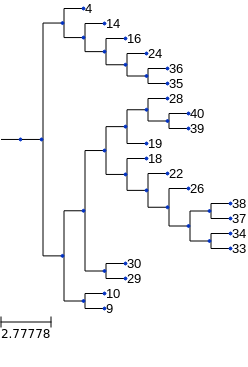

In [229]:
cells.log.ancestry().render('%%inline')

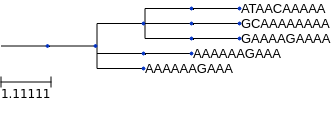

In [230]:
cells.log.mutations().render('%%inline')

# Putting it all together

In [231]:
sys = System()

In [232]:
sys.add(CellLine(),
        name='cells')

In [233]:
world = World()
log = FullLog()

In [234]:
sys['cells'].register_log(log)

In [235]:
middle = world.at(world.rows//2, world.cols//2)

In [236]:
sys['cells'].add_cell_to(middle, log=log)

New cell 0 added @ (5, 5)


In [237]:
sys.run(steps=10)

Cell no. 0 dividing @ (5, 5)
	New cells: 2 @ (6, 6) and 1 @ (6, 6)
Cell no. 2 mutating @ site (6, 6) (father 0)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(9, 'A')]
                	 Final genome: AAAAAAAAAA
Cell no. 1 dividing @ (6, 6)
	New cells: 4 @ (6, 6) and 3 @ (6, 6)
Cell no. 3 dividing @ (6, 6)
	New cells: 6 @ (7, 6) and 5 @ (6, 7)
Cell no. 4 migrating from site (6, 6) (father 1)
	 New site: (5, 6)
Cell no. 2 dividing @ (6, 6)
	New cells: 8 @ (7, 5) and 7 @ (5, 6)
Cell no. 6 mutating @ site (7, 6) (father 3)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(8, 'G')]
                	 Final genome: AAAAAAAAGA
Cell no. 7 death @ site (5, 6) (father 2)
Cell no. 4 death @ site (5, 6) (father 1)
Cell no. 8 dividing @ (7, 5)
	New cells: 10 @ (8, 5) and 9 @ (7, 6)
Cell no. 5 mutating @ site (6, 7) (father 3)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations:

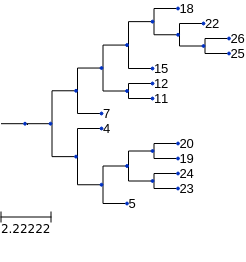

In [238]:
log.ancestry().render('%%inline')

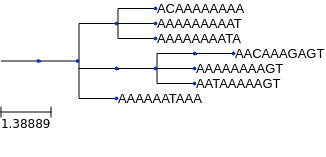

In [239]:
log.mutations().render('%%inline')

In [253]:
class CellSystem(System):
    "A system simulating cell growth."
    
    def __init__(self, *args, **kwargs):
        """Initialization process.
        
        A cell system has the same attributes that a system has,
        with the addition of a 'world' representing the world
        that the cells inhabit and a 'log' that follows  and makes
        a record of the cells' actions.
        
        At initialization, a new cell lineage is registered.
        
        """
        super().__init__(*args, **kwargs)
        
        self.world = World()
        self.log = FullLog()
        
        # Initialize the cells
        self.add(CellLine(), name='cells')
        self['cells'].register_log(self.log)
    # ---
    
    def seed(self):
        'Place a single cell in the middle of the world.'
        # Fetch the middle of the grid
        middle = self.world.at(world.rows//2, 
                               world.cols//2)
        # Add cell
        self['cells'].add_cell_to(middle, 
                                  log=self.log)
    # ---

In [254]:
sys = CellSystem()

In [255]:
sys.seed()

New cell 0 added @ (5, 5)


In [256]:
sys.run(steps=20)

Cell no. 0 dividing @ (5, 5)
	New cells: 2 @ (5, 5) and 1 @ (4, 6)
Cell no. 1 migrating from site (4, 6) (father None)
	 New site: (4, 5)
Cell no. 2 mutating @ site (5, 5) (father 0)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(1, 'A')]
                	 Final genome: AAAAAAAAAA
Cell no. 2 migrating from site (5, 5) (father 0)
	 New site: (5, 4)
Cell no. 1 migrating from site (4, 5) (father None)
	 New site: (4, 4)
Cell no. 2 death @ site (5, 4) (father 0)
Cell no. 1 dividing @ (4, 4)
	New cells: 4 @ (4, 4) and 3 @ (3, 3)
Cell no. 3 migrating from site (3, 3) (father 1)
	 New site: (2, 3)
Cell no. 4 dividing @ (4, 4)
	New cells: 6 @ (3, 5) and 5 @ (3, 5)
Cell no. 3 migrating from site (2, 3) (father 1)
	 New site: (1, 3)
Cell no. 5 migrating from site (3, 5) (father 4)
	 New site: (3, 4)
Cell no. 6 dividing @ (3, 5)
	New cells: 8 @ (3, 4) and 7 @ (4, 4)
Cell no. 8 mutating @ site (3, 4) (father 6)
		 Initial mutations: []
                	

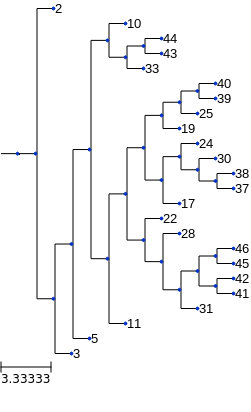

In [257]:
sys.log.ancestry().render('%%inline')

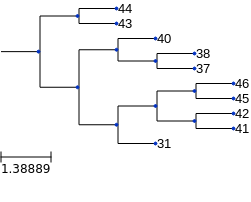

In [258]:
sys.log.ancestry(prune_death=True).render('%%inline')

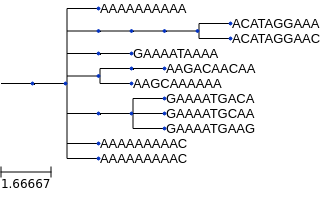

In [259]:
sys.log.mutations().render('%%inline')

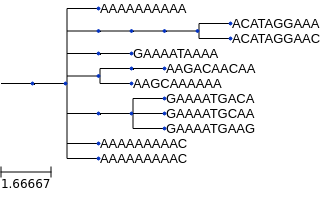

In [260]:
sys.log.mutations(prune_death=True).render('%%inline')

In [269]:
cells = sys['cells'].alive_cells

In [274]:
m = { cell.index:cell.mutations for cell in cells }
m

{31: [(1, 'A'), (9, 'C')],
 37: [(5, 'T'), (0, 'G'), (6, 'G'), (9, 'A'), (9, 'G')],
 38: [(5, 'T'), (0, 'G'), (6, 'G'), (9, 'A'), (7, 'C')],
 40: [(2, 'G'), (7, 'C'), (4, 'C')],
 41: [(1, 'A')],
 42: [(1, 'A')],
 43: [(3, 'T'), (1, 'C'), (5, 'G'), (6, 'G'), (9, 'C')],
 44: [(3, 'T'), (1, 'C'), (5, 'G'), (6, 'G'), (9, 'C')],
 45: [(1, 'A')],
 46: [(1, 'A')]}

In [280]:
def clean_mutations(mutations):
    print('before', mutations)
    seen = {}
    for pos, mut in mutations:
        seen[pos] = mut
    return set(seen.items())

distances = {}
for cell, mutations in m.items():
    # Remove mutations in the same nucleotide
    muts = clean_mutations(mutations)
    print('after', muts)
    for other, other_mutations in m.items():
        other_muts = clean_mutations(other_mutations)
        print('after', other_muts)
        mutations_apart =  len(muts ^ other_muts)
        distances[(cell,other)] = mutations_apart

before [(1, 'A')]
after {(1, 'A')}
before [(1, 'A')]
after {(1, 'A')}
before [(2, 'G'), (7, 'C'), (4, 'C')]
after {(4, 'C'), (2, 'G'), (7, 'C')}
before [(5, 'T'), (0, 'G'), (6, 'G'), (9, 'A'), (7, 'C')]
after {(5, 'T'), (9, 'A'), (0, 'G'), (7, 'C'), (6, 'G')}
before [(5, 'T'), (0, 'G'), (6, 'G'), (9, 'A'), (9, 'G')]
after {(5, 'T'), (6, 'G'), (0, 'G'), (9, 'G')}
before [(1, 'A')]
after {(1, 'A')}
before [(1, 'A'), (9, 'C')]
after {(1, 'A'), (9, 'C')}
before [(1, 'A')]
after {(1, 'A')}
before [(1, 'A')]
after {(1, 'A')}
before [(3, 'T'), (1, 'C'), (5, 'G'), (6, 'G'), (9, 'C')]
after {(9, 'C'), (3, 'T'), (1, 'C'), (5, 'G'), (6, 'G')}
before [(3, 'T'), (1, 'C'), (5, 'G'), (6, 'G'), (9, 'C')]
after {(9, 'C'), (3, 'T'), (1, 'C'), (5, 'G'), (6, 'G')}
before [(2, 'G'), (7, 'C'), (4, 'C')]
after {(4, 'C'), (2, 'G'), (7, 'C')}
before [(1, 'A')]
after {(1, 'A')}
before [(2, 'G'), (7, 'C'), (4, 'C')]
after {(4, 'C'), (2, 'G'), (7, 'C')}
before [(5, 'T'), (0, 'G'), (6, 'G'), (9, 'A'), (7, 'C')]
af

In [281]:
distances

{(31, 31): 0,
 (31, 37): 6,
 (31, 38): 7,
 (31, 40): 5,
 (31, 41): 1,
 (31, 42): 1,
 (31, 43): 5,
 (31, 44): 5,
 (31, 45): 1,
 (31, 46): 1,
 (37, 31): 6,
 (37, 37): 0,
 (37, 38): 3,
 (37, 40): 7,
 (37, 41): 5,
 (37, 42): 5,
 (37, 43): 7,
 (37, 44): 7,
 (37, 45): 5,
 (37, 46): 5,
 (38, 31): 7,
 (38, 37): 3,
 (38, 38): 0,
 (38, 40): 6,
 (38, 41): 6,
 (38, 42): 6,
 (38, 43): 8,
 (38, 44): 8,
 (38, 45): 6,
 (38, 46): 6,
 (40, 31): 5,
 (40, 37): 7,
 (40, 38): 6,
 (40, 40): 0,
 (40, 41): 4,
 (40, 42): 4,
 (40, 43): 8,
 (40, 44): 8,
 (40, 45): 4,
 (40, 46): 4,
 (41, 31): 1,
 (41, 37): 5,
 (41, 38): 6,
 (41, 40): 4,
 (41, 41): 0,
 (41, 42): 0,
 (41, 43): 6,
 (41, 44): 6,
 (41, 45): 0,
 (41, 46): 0,
 (42, 31): 1,
 (42, 37): 5,
 (42, 38): 6,
 (42, 40): 4,
 (42, 41): 0,
 (42, 42): 0,
 (42, 43): 6,
 (42, 44): 6,
 (42, 45): 0,
 (42, 46): 0,
 (43, 31): 5,
 (43, 37): 7,
 (43, 38): 8,
 (43, 40): 8,
 (43, 41): 6,
 (43, 42): 6,
 (43, 43): 0,
 (43, 44): 0,
 (43, 45): 6,
 (43, 46): 6,
 (44, 31): 5,
 (44, 

In [282]:
set(distances.values())

{0, 1, 3, 4, 5, 6, 7, 8}

In [283]:
len(set(distances.values()))

8

In [289]:
indices = {item:i for i, item in enumerate(m.keys())}
indices

{31: 5, 37: 3, 38: 2, 40: 1, 41: 7, 42: 4, 43: 9, 44: 8, 45: 0, 46: 6}

In [290]:
class System:
    """
    The global system and event dispatcher.

    Aware of hosts, space, and the passage of time (steps). It is
    the main struture of the program, being the only observable and given it
    coordinates all processes.

    """

    def __init__(self):
        'Initialize an empty system.'
        self.entities = set()
        self.procesable = set()
        self.toentity = {}
        self.toentityname = {}
        
        self.interactions = {}
        self.time = None
        
        self.inithooks = {}
        self.prehooks = {}
        self.hooks = {}
    # ---
    
    def __getitem__(self, entityname):
        'Access the entities by name.'
        return self.toentity[entityname]
    # ---

    def add(self, entity, name, procesable=True, inithook=None):
        """Add an entity to the graph.
        
        If procesable, the entity.process(time) method is called 
        on each time step.
        
        Inithooks are callables called at initialization.
        
        """
        self.entities.add(entity)
        if procesable:
            self.procesable.add(entity)
        self.toentity[name] = entity
        self.toentityname[entity] = name
        # Process hooks
        if inithook:
            self.add_interaction_to(self.inithooks,
                                    inithook, 
                                    [name])
    # ---
    
    def process_interactions_in(self, interactions):
        'From the dict-like container of interactions, process items.'
        for interaction in interactions.values():
            interaction.process()
    # ---
        
    def step(self):
        'Take a single step forward in time.'
        # Process pre-step hooks
        self.process_interactions_in(self.prehooks)
        
        # Process linked items
        self.process_interactions_in(self.interactions)
        # Process each entity
        for entity in self.procesable:
            entity.process(self.time)
            
        # Process post-step hooks
        self.process_interactions_in(self.hooks)
    # ---
         
    def start(self):
        'Initialize things before starting simulation.'
        # Init time
        if self.time is None:
            self.time = 0
        # Make the initialization actions
        self.process_interactions_in(self.inithooks)
    # ---
    
    def update_hooks(self, hooktype, newhooks):
        'Add the given hooks to the system.'
        if newhooks:
            for hook in newhooks:
                self.add_interaction_to(hooktype, hook.effects, hook.entities)
    # ---
         
    def run(self, steps, init=None, after_step=None, before_step=None):
        'Start running the simulation.'
        # Handle hooks
        self.update_hooks(self.inithooks, init)
        self.update_hooks(self.hooks, after_step)
        self.update_hooks(self.prehooks, before_step)
        
        # Make sure things are initialized 
        self.start()
        
        # Take steps
        for _ in range(steps):
            self.step() 
    # ---
    
    def stateof(self, entityname):
        "Ask the entity for it's state"
        return self[entityname].state
    # ---
    
    def link(self, effect, entitynames):
        'Add an interation btw named entities.'
        self.add_interaction_to(self.interactions,
                                effect, 
                                entitynames)
    # ---
    
    def add_interaction_to(self, container, effect, entitynames):
        'Add an interaction btw named entities to a dict-like container.'
        entities = tuple(self.toentity[ename] 
                                for ename in entitynames)
        
        # Check if there is already some link btw
        # those same entities.
        if entities in container:
            # Add the new effect
            container[entities].append(effect)
            
        else:
            # Else, add the new link
            interaction = Interaction(entities, effect)
            container[entities] = interaction
    # ---
# --- System

In [292]:
class CellSystem(System):
    "A system simulating cell growth."
    
    def __init__(self, *args, **kwargs):
        """Initialization process.
        
        A cell system has the same attributes that a system has,
        with the addition of a 'world' representing the space
        that the cells inhabit and a 'log' that follows  and makes
        a record of the cells' actions.
        
        At initialization, a new cell lineage is registered.
        
        """
        super().__init__(*args, **kwargs)
        
        self.add(World(), name='world', procesable=False)
        self.add(FullLog(), name='log', procesable=False)
        
        # Initialize the cells
        self.add(CellLine(), name='cells')
        self['cells'].register_log(self['log'])
    # ---
    
    def seed(self):
        'Place a single cell in the middle of the world.'
        # Fetch the middle of the grid
        world = self['world']
        middle = world.at( world.rows//2, 
                           world.cols//2 )
        # Add cell
        self['cells'].add_cell_to(middle, 
                                  log=self['log'])
    # ---

In [293]:
sys = CellSystem()

In [294]:
sys.seed()

New cell 0 added @ (5, 5)


In [295]:
sys.run(steps=20)

Cell no. 0 migrating from site (5, 5) (father None)
	 New site: (4, 5)
Cell no. 0 dividing @ (4, 5)
	New cells: 2 @ (4, 4) and 1 @ (3, 4)
Cell no. 1 dividing @ (3, 4)
	New cells: 4 @ (3, 5) and 3 @ (2, 3)
Cell no. 2 death @ site (4, 4) (father 0)
Cell no. 4 death @ site (3, 5) (father 1)
Cell no. 3 migrating from site (2, 3) (father 1)
	 New site: (3, 4)
Cell no. 3 dividing @ (3, 4)
	New cells: 6 @ (3, 4) and 5 @ (3, 3)
Cell no. 6 death @ site (3, 4) (father 3)
Cell no. 5 migrating from site (3, 3) (father 3)
	 New site: (2, 4)
Cell no. 5 dividing @ (2, 4)
	New cells: 8 @ (2, 3) and 7 @ (3, 3)
Cell no. 8 mutating @ site (2, 3) (father 5)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(2, 'G')]
                	 Final genome: AAGAAAAAAA
Cell no. 7 mutating @ site (3, 3) (father 5)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(8, 'T')]
                	 Final genome: AAAAAAAATA
Cell no. 7 migrating 

In [296]:
history = sys['log']

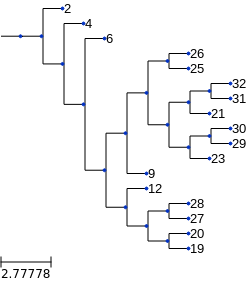

In [297]:
history.ancestry().render('%%inline')

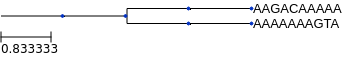

In [298]:
history.mutations().render('%%inline')